In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#### Here we are using the processed diabates data so null values are not there.

In [2]:
diabetes = pd.read_csv('../datasets/diabetes_processed.csv')

diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.000000,35.0,219.028414,33.6,0.627,50.0,1
1,1.0,85.0,66.000000,29.0,70.341550,26.6,0.351,31.0,0
2,8.0,183.0,64.000000,32.0,270.573172,23.3,0.672,32.0,1
3,1.0,89.0,66.000000,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.000000,35.0,168.000000,43.1,2.288,33.0,1
5,5.0,116.0,74.000000,32.0,127.840221,25.6,0.201,30.0,0
6,3.0,78.0,50.000000,32.0,88.000000,31.0,0.248,26.0,1
7,10.0,115.0,72.405184,32.0,136.570245,35.3,0.134,29.0,0
8,2.0,197.0,70.000000,45.0,543.000000,30.5,0.158,53.0,1
9,8.0,125.0,96.000000,32.0,155.571480,32.0,0.232,54.0,1


In [3]:
features_df = diabetes.drop('Outcome', axis=1)
target_df = diabetes['Outcome']

features_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,219.028414,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,70.341550,26.6,0.351,31.0
2,8.0,183.0,64.0,32.0,270.573172,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0


In [4]:
features_df.shape

(768, 8)

In [5]:
features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.405184,29.994792,152.815064,32.450911,0.471876,33.240885
std,3.369578,30.438286,12.096346,8.886506,97.206638,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,-16.568152,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,89.976015,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.202592,32.000000,131.100779,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,189.857469,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Rescale Data
#### rescaling data between 0 and 1
#### MinMaxScaler
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(features_df)
rescaled_features.shape

(768, 8)

In [7]:
rescaled_features[0:5]

array([[0.35294118, 0.67096774, 0.48979592, 0.30434783, 0.27313386,
        0.31492843, 0.23441503, 0.48333333],
       [0.05882353, 0.26451613, 0.42857143, 0.23913043, 0.10075691,
        0.17177914, 0.11656704, 0.16666667],
       [0.47058824, 0.89677419, 0.40816327, 0.27173913, 0.33289117,
        0.10429448, 0.25362938, 0.18333333],
       [0.05882353, 0.29032258, 0.42857143, 0.17391304, 0.12818483,
        0.20245399, 0.03800171, 0.        ],
       [0.        , 0.6       , 0.16326531, 0.30434783, 0.21397515,
        0.50920245, 0.94363792, 0.2       ]])

In [8]:
rescaled_features_df = pd.DataFrame(rescaled_features, columns=features_df.columns)

rescaled_features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501008,0.493930,0.249943,0.196371,0.291430,0.168179,0.204015
std,0.198210,0.196376,0.123432,0.096592,0.112694,0.140601,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.123520,0.190184,0.070773,0.050000
50%,0.176471,0.470968,0.491863,0.271739,0.171197,0.282209,0.125747,0.133333
75%,0.352941,0.620968,0.571429,0.271739,0.239315,0.376278,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


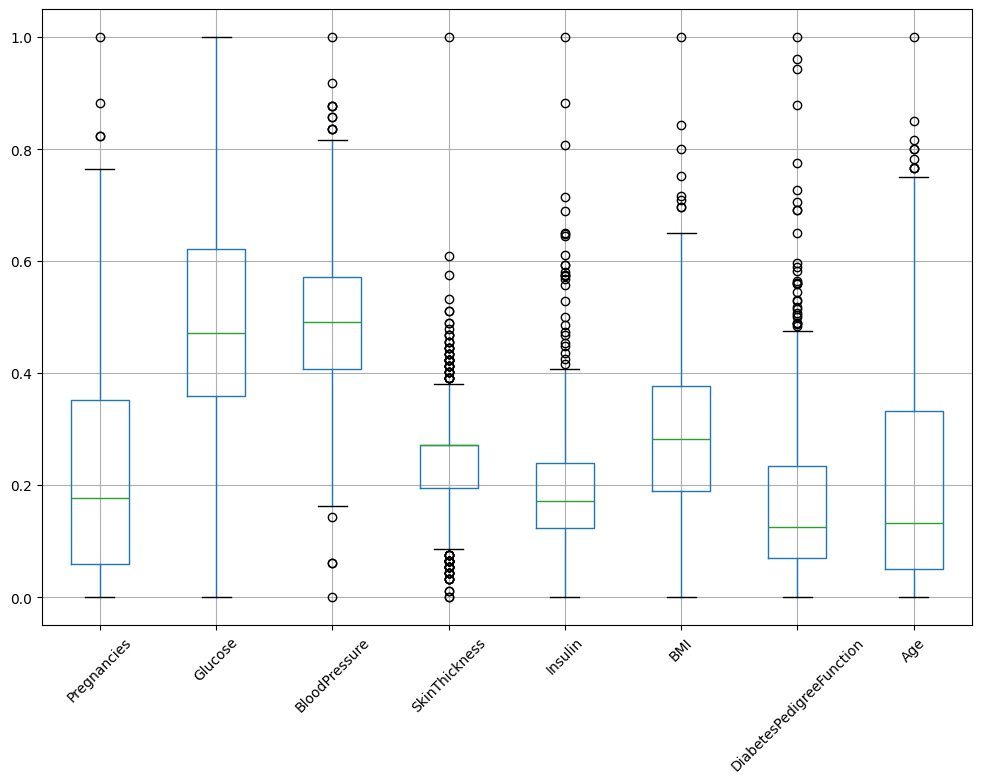

In [9]:
rescaled_features_df.boxplot(figsize=(12, 8), rot=45)

plt.show()

### Standardize Data
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(features_df)
standardized_features = scaler.transform(features_df)
# value after Standardization (standard deviation)
standardized_features[0:5]

array([[ 0.63994726,  0.86604475, -0.03351824,  0.56360399,  0.68160469,
         0.16724016,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.52985903, -0.11201703, -0.8489879 ,
        -0.85155088, -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69530596,  0.22579348,  1.21220989,
        -1.33183808,  0.60439732, -0.10558415],
       [-0.84488505, -1.07356674, -0.52985903, -0.78763804, -0.60544623,
        -0.63323851, -0.92076261, -1.04154944],
       [-1.14185152,  0.50442227, -2.68066914,  0.56360399,  0.15631476,
         1.54988514,  5.4849091 , -0.0204964 ]])

In [11]:
standardized_features_df = pd.DataFrame(standardized_features, columns=features_df.columns)

standardized_features_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,4.625929e-18,6.915764e-16,-1.318390e-16,2.775558e-17,4.672189e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552931e+00,-4.004245e+00,-2.589294e+00,-1.743642e+00,-2.074100e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.201630e-01,-6.953060e-01,-5.624310e-01,-6.468694e-01,-7.205635e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.530732e-01,-1.675912e-02,2.257935e-01,-2.235283e-01,-6.562636e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.112653e-01,6.282695e-01,2.257935e-01,3.813170e-01,6.038649e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542658e+00,4.102655e+00,7.770228e+00,7.135692e+00,5.042883e+00,5.883565e+00,4.063716e+00


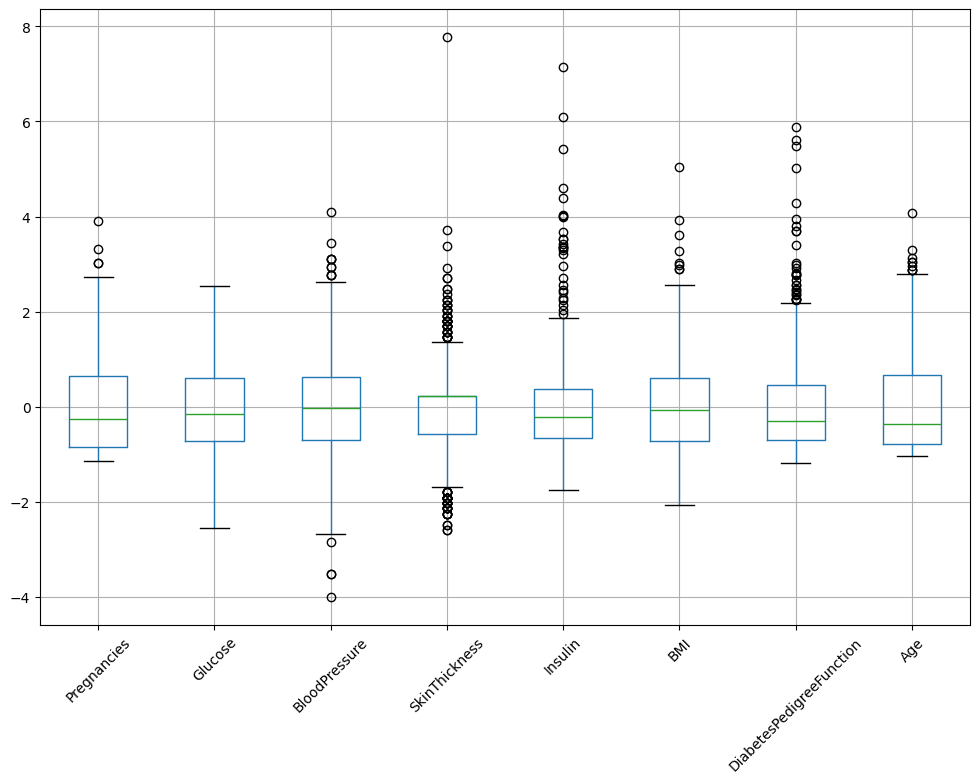

In [12]:
standardized_features_df.boxplot(figsize=(12, 8), rot=45)

plt.show()

### Normalize Data
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

Normalization applies a transformation to each row (sample) in the data so that it fulfils a norm condition. For example, if the value of features in a row are f1, f2, f3...fn then:
* <b>L1 norm:</b> |f1| + |f2| + |f3| ... |fn| = 1
* <b>L2 norm:</b> sqrt(f1<sup>2</sup> + f2<sup>2</sup> + f3<sup>2</sup>...fn<sup>2</sup>) = 1
* <b>Max norm:</b> Each value is expressed as a proportion of a max value in the row

In [13]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l1')
normalized_features = normalizer.fit_transform(features_df)

normalized_features[0:5]

array([[0.01063348, 0.26229257, 0.12760179, 0.06202865, 0.38817246,
        0.0595475 , 0.0011112 , 0.08861235],
       [0.00323318, 0.27482072, 0.2133902 , 0.09376236, 0.22742724,
        0.08600272, 0.00113485, 0.10022873],
       [0.01303897, 0.29826655, 0.1043118 , 0.0521559 , 0.44099959,
        0.03797601, 0.00109527, 0.0521559 ],
       [0.00310302, 0.27616852, 0.20479913, 0.07136939, 0.2916836 ,
        0.08719478, 0.0005182 , 0.06516336],
       [0.        , 0.29887344, 0.08726232, 0.07635453, 0.36650174,
        0.09402515, 0.0049914 , 0.07199141]])

In [14]:
l1_normalized_features_df = pd.DataFrame(normalized_features, columns=features_df.columns)
l1_normalized_features_df.iloc[0]

Pregnancies                 0.010633
Glucose                     0.262293
BloodPressure               0.127602
SkinThickness               0.062029
Insulin                     0.388172
BMI                         0.059548
DiabetesPedigreeFunction    0.001111
Age                         0.088612
Name: 0, dtype: float64

In [15]:
l1_normalized_features_df.iloc[0].abs().sum()

np.float64(1.0)

In [16]:
normalizer = Normalizer(norm='l2')
normalized_features = normalizer.fit_transform(features_df)
l2_normalized_features_df = pd.DataFrame(normalized_features, columns=features_df.columns)

l2_normalized_features_df.iloc[0].pow(2)

Pregnancies                 0.000450
Glucose                     0.273965
BloodPressure               0.064839
SkinThickness               0.015322
Insulin                     0.600030
BMI                         0.014121
DiabetesPedigreeFunction    0.000005
Age                         0.031269
Name: 0, dtype: float64

In [17]:
l2_normalized_features_df.iloc[0].pow(2).sum()

np.float64(0.9999999999999998)

In [18]:
normalizer = Normalizer(norm='max')
normalized_features = normalizer.fit_transform(features_df)
max_normalized_features_df = pd.DataFrame(normalized_features, columns=features_df.columns)

max_normalized_features_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.027394,0.675711,0.328724,0.159797,1.000000,0.153405,0.002863,0.228281
1,0.011765,1.000000,0.776471,0.341176,0.827548,0.312941,0.004129,0.364706
2,0.029567,0.676342,0.236535,0.118267,1.000000,0.086113,0.002484,0.118267
3,0.010638,0.946809,0.702128,0.244681,1.000000,0.298936,0.001777,0.223404
4,0.000000,0.815476,0.238095,0.208333,1.000000,0.256548,0.013619,0.196429


### Binarize Data
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html  
(discretize data)
##### You can transform your data using a binary threshold. All values above the threshold are marked 1 and all equal to or below are marked as 0. Here we are taking mean as threshold value.

In [19]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=float((features_df[['Pregnancies']]).mean()))
binarized_features = binarizer.fit_transform(features_df[['Pregnancies']])

binarized_features[0:10]

C:\Users\julien\AppData\Local\Temp\ipykernel_26952\295499680.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  binarizer = Binarizer(threshold=float((features_df[['Pregnancies']]).mean()))


array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]])

#### This time we are using a for loop and one by one binarizing all the columns and concatenating with the already existing array 'binarized_features'. Notice that we are staring the for loop with 1 because first column is already binarized.

In [20]:
for i in range(1, features_df.shape[1]):
    
    scaler = Binarizer(threshold=float((features_df[[features_df.columns[i]]]).mean())). \
                                        fit(features_df[[features_df.columns[i]]])

    new_binarized_feature = scaler.transform(features_df[[features_df.columns[i]]])
    
    binarized_features = np.concatenate((binarized_features, new_binarized_feature), axis=1)

C:\Users\julien\AppData\Local\Temp\ipykernel_26952\3594410950.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  scaler = Binarizer(threshold=float((features_df[[features_df.columns[i]]]).mean())). \
C:\Users\julien\AppData\Local\Temp\ipykernel_26952\3594410950.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  scaler = Binarizer(threshold=float((features_df[[features_df.columns[i]]]).mean())). \
C:\Users\julien\AppData\Local\Temp\ipykernel_26952\3594410950.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  scaler = Binarizer(threshold=float((features_df[[features_df.columns[i]]]).mean())). \
C:\Users\julien\AppData\Local\Temp\ipykernel_26952\3594410950.py:3: FutureWarning: Calling float on 

In [21]:
binarized_features[0:10]

array([[1., 1., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 1., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1.]])

#### Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def build_model(X, Y, test_frac):
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)    
    model = LogisticRegression(solver='liblinear').fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print("Test_score : ", accuracy_score(y_test, y_pred))

In [23]:
build_model(rescaled_features, target_df, 0.2)

Test_score :  0.7922077922077922


In [24]:
build_model(standardized_features, target_df, 0.2)

Test_score :  0.8051948051948052


In [25]:
build_model(normalized_features, target_df, 0.2)

Test_score :  0.6558441558441559


In [26]:
build_model(binarized_features, target_df, 0.2)

Test_score :  0.7337662337662337
